# Pre-processing Test
Test our data augmentation functions in `filters.py` and CV2 functions on the dataset here.

In [1]:
import os
import sys
from pathlib import Path

import torch
import torchvision as vision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import random
from matplotlib import pyplot as plt

sys.path.append("..")
import filters

%matplotlib inline
plt.rcParams['figure.figsize'] = (32.0, 32.0) # set default size of plots

In [2]:
# Global Vars
device = 'cpu'

path = '../../Datasets/ImageNet-Sketch/sketch'
custom_path = '../../Datasets/Custom/Imagenet-Sketch'

image_size = 224
batch_size= 64


In [3]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# get class mapping
def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

classes, class_dict = find_classes(path)
dataset_total_size = len(classes)

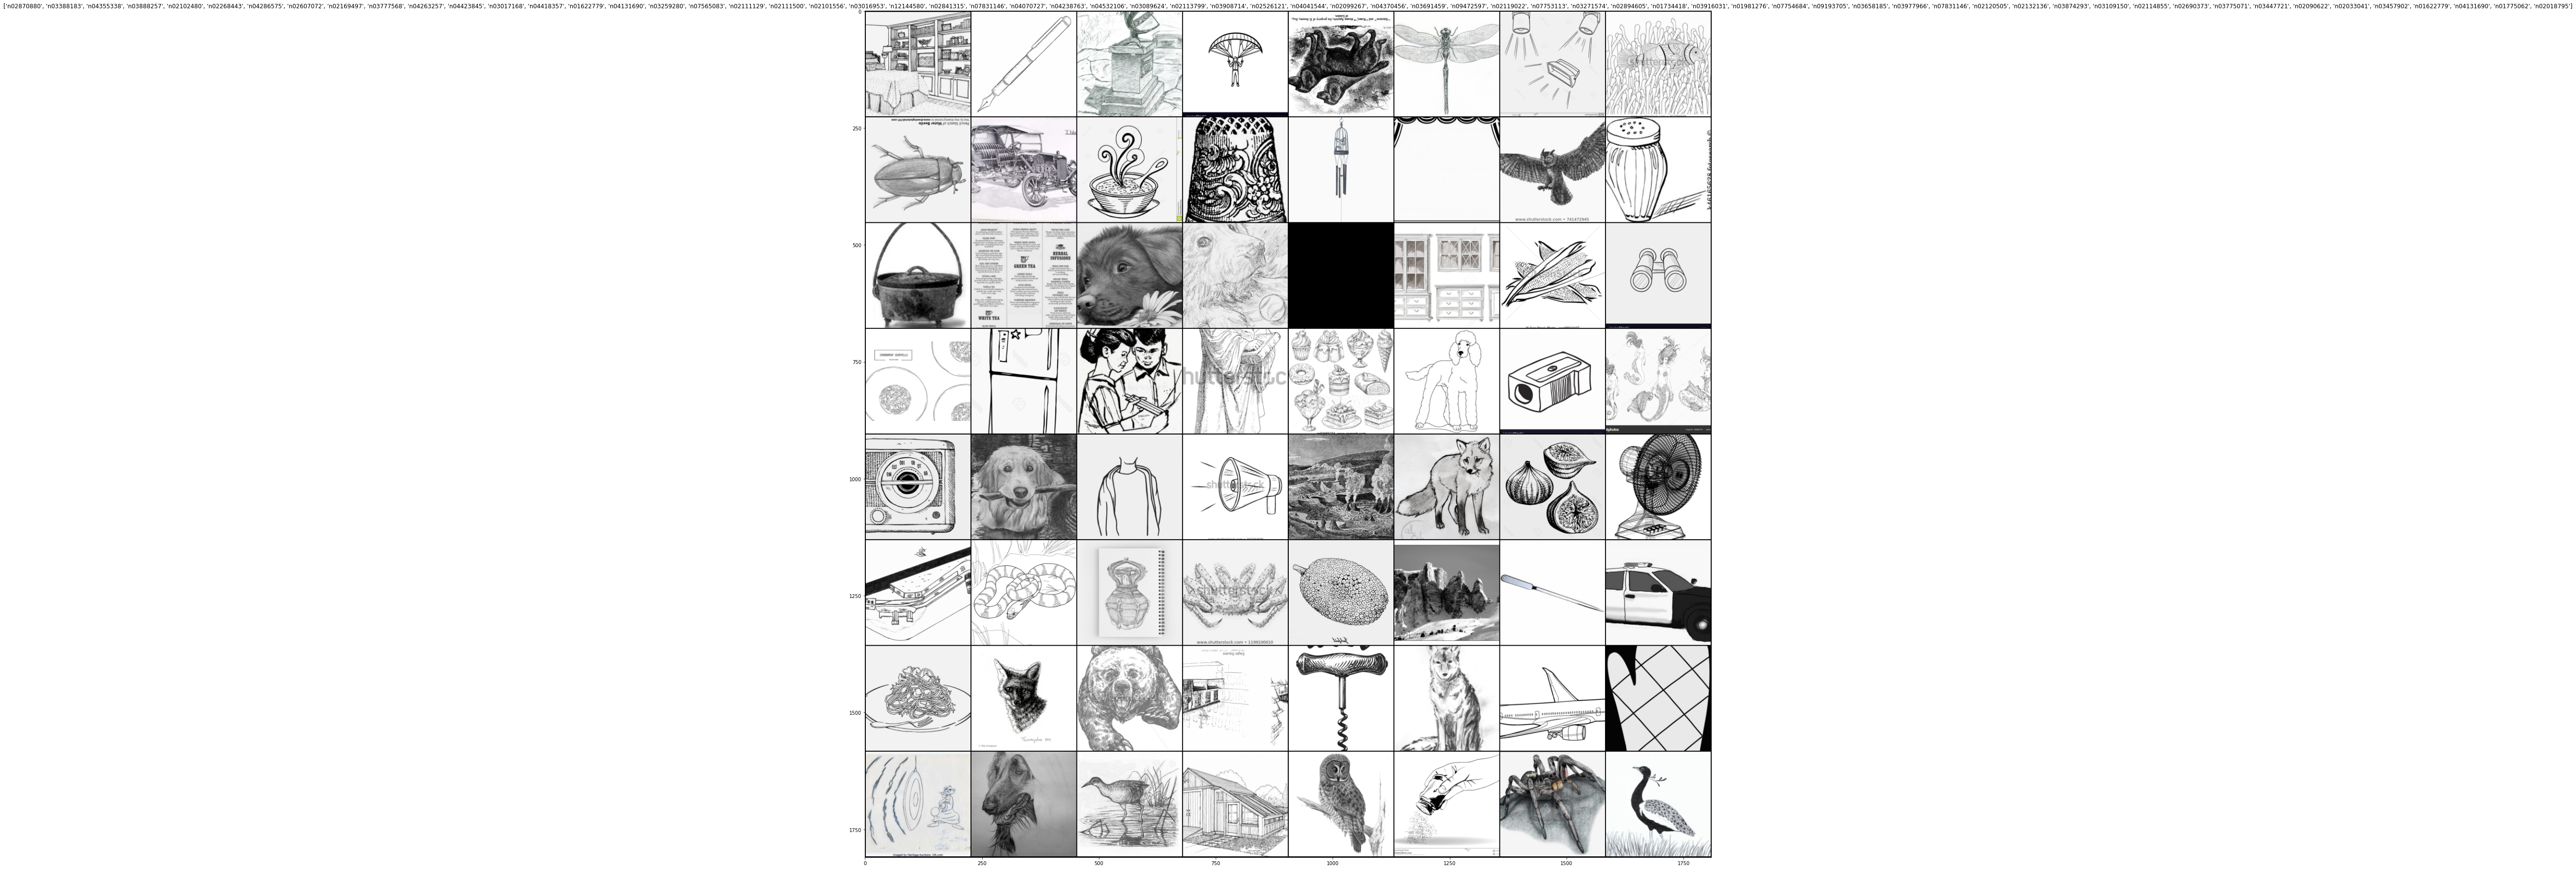

In [4]:
# Test loading in the data
idx = random.randint(0, 999)

# Apply transforms
transform = [transforms.Resize(image_size+1), transforms.CenterCrop(image_size), transforms.ToTensor()]
transform = filters.get_color_distortion(transform, 0.1)
transform = transforms.Compose(transform)

full = datasets.ImageFolder(path, transform=transform)
full_dataloader = DataLoader(full, batch_size=batch_size, shuffle=True)

# Get a batch of training data
inputs, labels = next(iter(full_dataloader))

# Make a grid from batch
out = vision.utils.make_grid(inputs)
imshow(out, title=[classes[x] for x in labels])


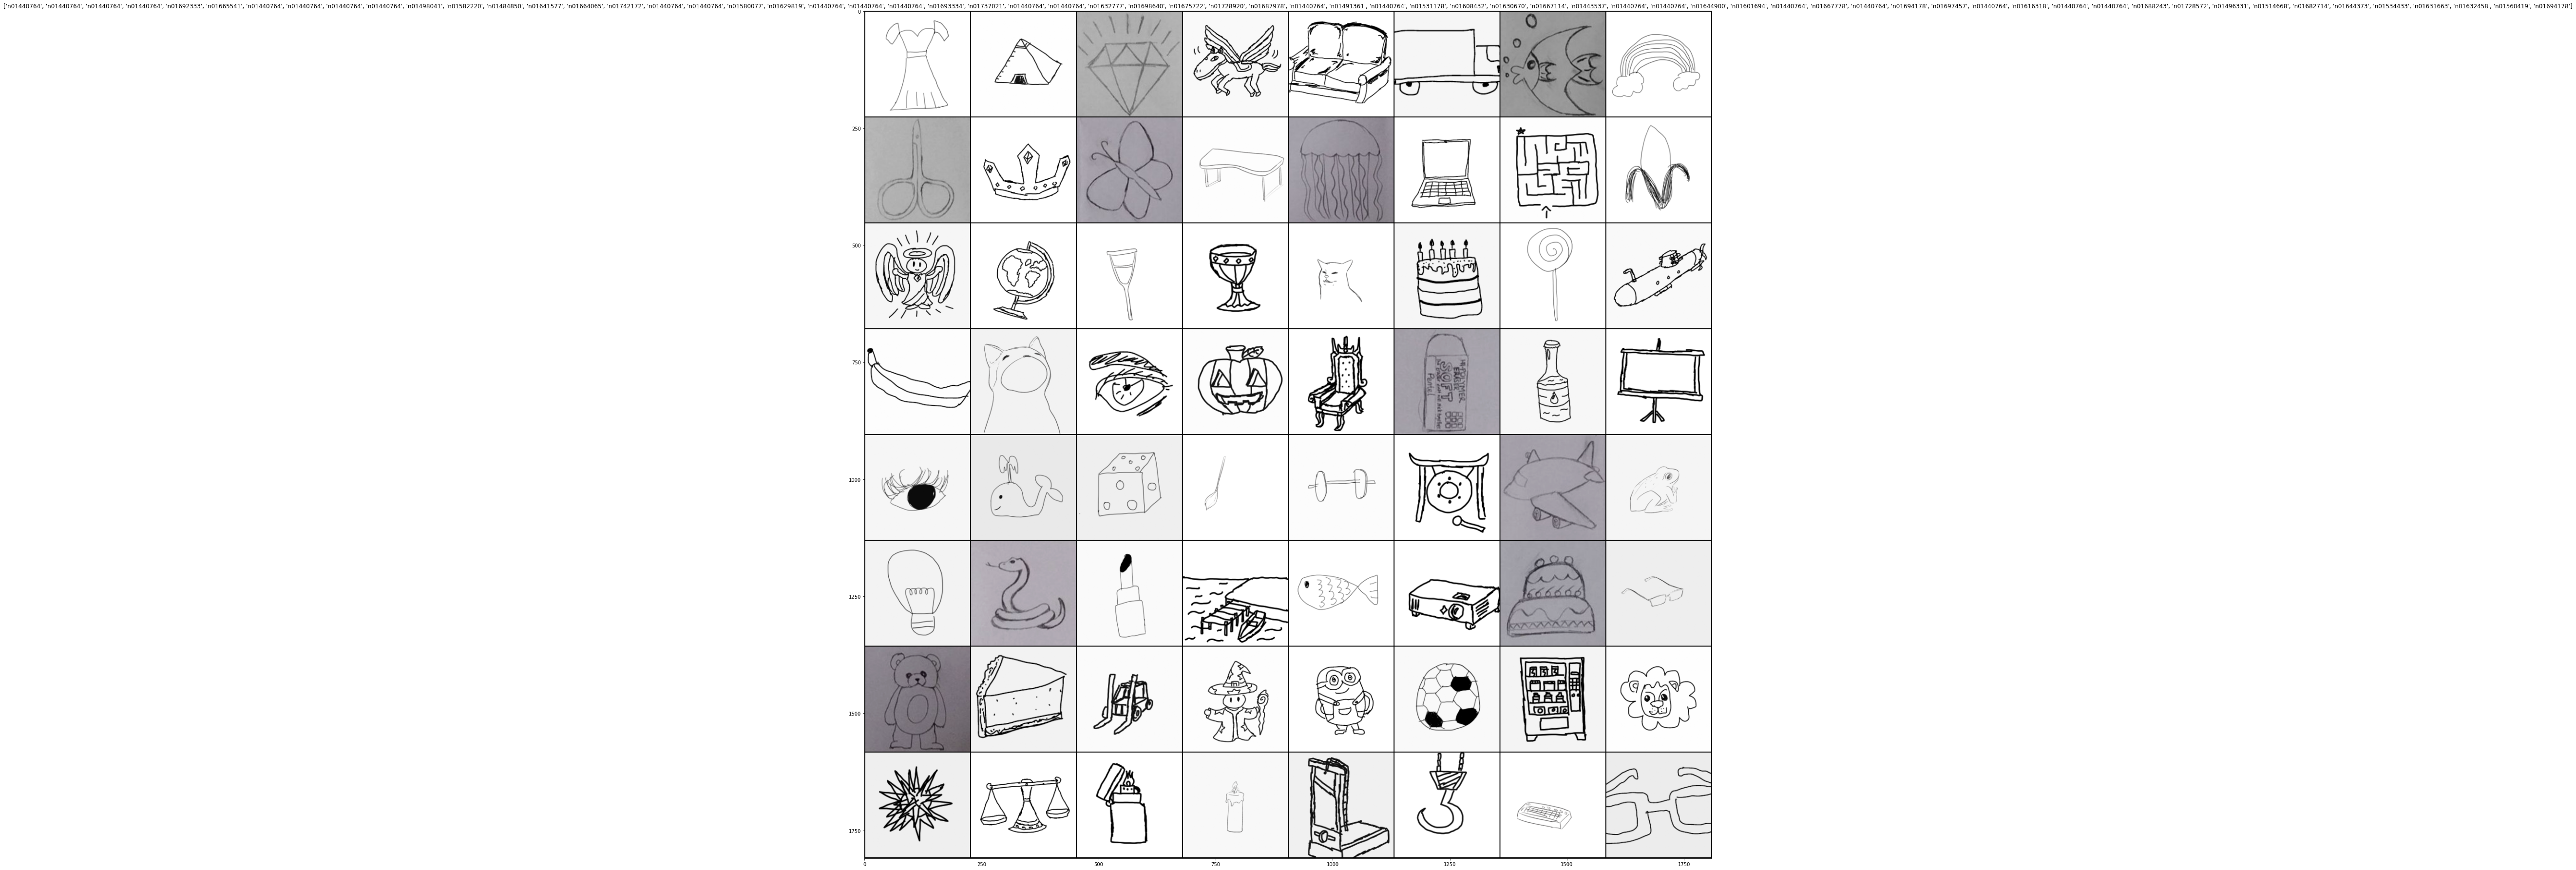

In [5]:
# on custom dataset
full = datasets.ImageFolder(custom_path, transform=transform)
full_dataloader = DataLoader(full, batch_size=batch_size, shuffle=True)

# Get a batch of training data
inputs, labels = next(iter(full_dataloader))

# Make a grid from batch
out = vision.utils.make_grid(inputs)
imshow(out, title=[classes[x] for x in labels])